In [4]:
import numpy as np
from astropy.io import fits
import astropy.units as u
from IPython.display import clear_output
from pathlib import Path
from importlib import reload
import time
import os

import cupy as cp

import poppy
from poppy.poppy_core import PlaneType

import misc

# set debugging mode for more information from POPPY as propagation is performed
import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

poppy_log.disabled = False

poppy.conf.use_cupy = False

import poppy_optics
clear_output()
reload(poppy_optics)
from poppy_optics import *

DEBUG:poppy:Initialized: Primary, fl =5.52e+00 m
DEBUG:poppy:Initialized: Secondary, fl =-6.79e-01 m
DEBUG:poppy:Trans: fits-files/roman_pupil_309.fits
DEBUG:poppy:OPD: None
INFO:poppy:Roman Pupil: Loaded amplitude transmission from fits-files/roman_pupil_309.fits
DEBUG:poppy:  Getting pixel scale from user-provided float value: 0.007741935483870968
DEBUG:poppy:Trans: None
DEBUG:poppy:OPD: fits-files/roman_primary_opd_529.fits
DEBUG:poppy:No transmission supplied - will assume uniform throughput = 1 
INFO:poppy:Roman Primary OPD: Loaded OPD from fits-files/roman_primary_opd_529.fits
INFO:poppy:No info supplied on amplitude transmission; assuming uniform throughput = 1
DEBUG:poppy:  Getting pixel scale from user-provided float value: 0.004536862003780718
DEBUG:poppy:Trans: fits-files/roman_pupil_309.fits
DEBUG:poppy:OPD: fits-files/roman_primary_opd_309.fits
INFO:poppy:Roman Primary: Loaded amplitude transmission from fits-files/roman_pupil_309.fits
INFO:poppy:Roman Primary: Loaded OPD 

# Test all the optics on a CPU by setting the configuration for CuPy to False.

# Test creating a fixed sampling optic in order.
Useful for debugging to ensure the amplitude/transmission and the OPD of an optic are calculated as expected. 

DEBUG:poppy:Converting Kolmogorov WFE to fixed sampling with grid_size=2.4 m, npix=256, oversample=4
DEBUG:poppy:retrieving oversampled opd and transmission arrays
INFO:poppy:Computing opd for Kolmogorov WFE sampled onto 1024 pixel grid with pixelscale 0.00234375 m / pix
INFO:poppy:Computing amplitude for Kolmogorov WFE sampled onto 1024 pixel grid with pixelscale 0.00234375 m / pix
DEBUG:poppy:binning down opd and transmission arrays


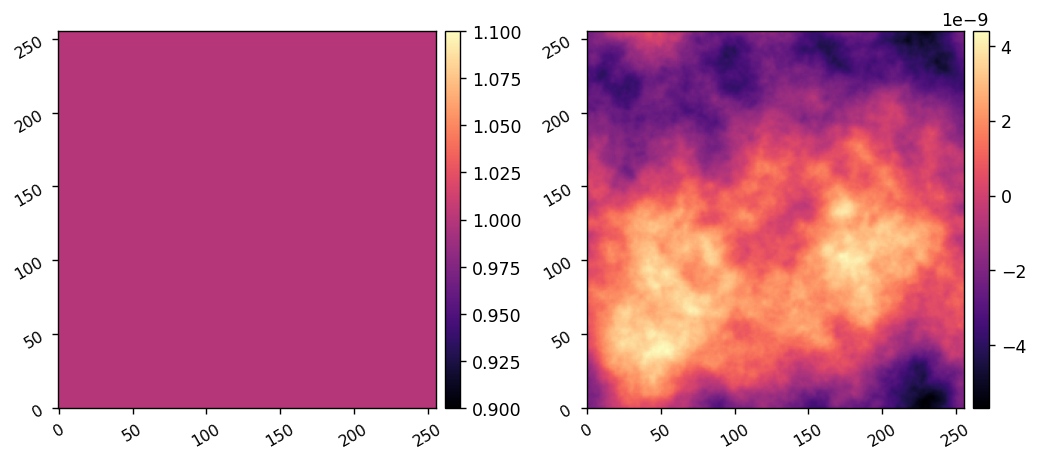

In [2]:
reload(poppy_optics)
from poppy_optics import *
clear_output()

# array_optic = poppy.fixed_sampling_optic(compound_pupil, wf, oversample)
# array_optic = poppy.fixed_sampling_optic(m1, wf, oversample)
# array_optic = poppy.fixed_sampling_optic(thin_lens, wf, oversample)
# array_optic = poppy.fixed_sampling_optic(gauss_ap, wf, oversample)
# array_optic = poppy.fixed_sampling_optic(zern_wfe, wf, oversample)
array_optic = poppy.fixed_sampling_optic(kol_wfe, wf, oversample)
# array_optic = poppy.fixed_sampling_optic(psd_wfe, wf, oversample)

misc.myimshow2(array_optic.amplitude, array_optic.opd)

# Test the use of Deformable Mirrors.

DEBUG:poppy:Converting DM to fixed sampling with grid_size=47.3 mm, npix=256, oversample=1
INFO:poppy:Computing opd for DM sampled onto 256 pixel grid with pixelscale 0.184765625 mm / pix
INFO:poppy:Computing amplitude for DM sampled onto 256 pixel grid with pixelscale 0.184765625 mm / pix


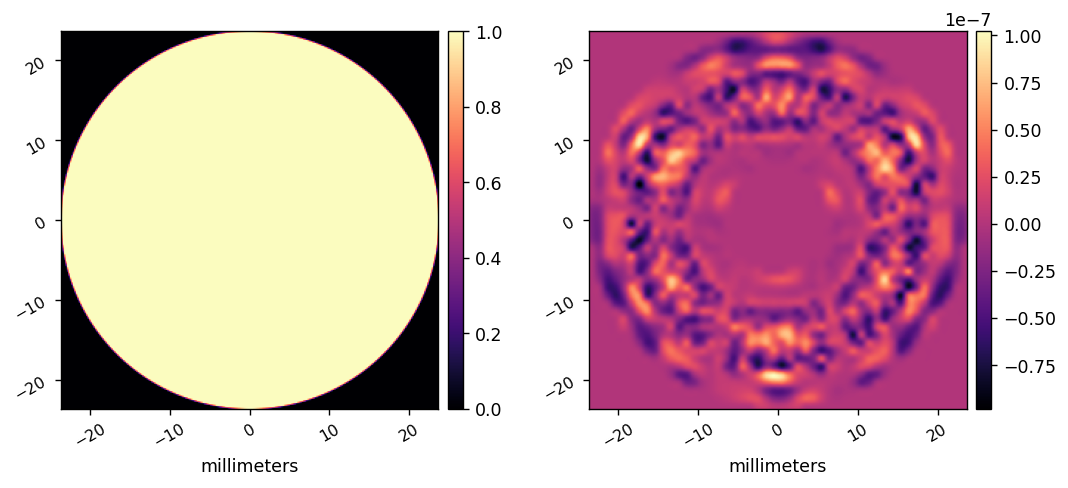

In [13]:
reload(poppy_optics)
from poppy_optics import *
clear_output()

# Deformable Mirror Tests
array_optic = poppy.fixed_sampling_optic(DM, wf_dm, oversample=1)
misc.myimshow2(array_optic.amplitude, array_optic.opd, 
               pxscl1=array_optic.pixelscale, pxscl2=array_optic.pixelscale)

# array_optic = poppy.fixed_sampling_optic(circ_seg_DM, wf_dm)
# misc.myimshow2(array_optic.amplitude, array_optic.opd, 
#                pxscl1=array_optic.pixelscale, pxscl2=array_optic.pixelscale)

# array_optic = poppy.fixed_sampling_optic(hex_seg_DM, wf_dm)
# misc.myimshow2(array_optic.amplitude, array_optic.opd, 
#                pxscl1=array_optic.pixelscale, pxscl2=array_optic.pixelscale)

# circ_seg_DM.set_actuator(1, -2.5e-7, 0, 0)
# circ_seg_DM.set_actuator(2, 3e-7, 0.1*u.milliradian, 0)
# circ_seg_DM.set_actuator(5, 0, 0.1*u.milliradian, 0.1*u.milliradian)

# opd = circ_seg_DM.get_opd(wf_dm)
# misc.myimshow(opd)

# hex_seg_DM.set_actuator(1, -2.5e-7, 0, 0)
# hex_seg_DM.set_actuator(2, 3e-7, 0.1*u.milliradian, 0)
# hex_seg_DM.set_actuator(5, 0, 0.1*u.milliradian, 0.1*u.milliradian)

# opd = hex_seg_DM.get_opd(wf_dm)
# misc.myimshow(opd)

# Create the OpticalSystem and calculate a PSF. 
A variety of optics can be added by just commenting out or uncommenting some lines. This is useful for testing each optic in an actual system to make sure it functions as expected during propagation. 

DEBUG:poppy:Initialized: Primary, fl =5.52e+00 m
DEBUG:poppy:Initialized: Secondary, fl =-6.79e-01 m
DEBUG:poppy:Trans: fits-files/roman_pupil_309.fits
DEBUG:poppy:OPD: None
INFO:poppy:Roman Pupil: Loaded amplitude transmission from fits-files/roman_pupil_309.fits
DEBUG:poppy:  Getting pixel scale from user-provided float value: 0.007741935483870968
DEBUG:poppy:Trans: None
DEBUG:poppy:OPD: fits-files/roman_primary_opd_529.fits
DEBUG:poppy:No transmission supplied - will assume uniform throughput = 1 
INFO:poppy:Roman Primary OPD: Loaded OPD from fits-files/roman_primary_opd_529.fits
INFO:poppy:No info supplied on amplitude transmission; assuming uniform throughput = 1
DEBUG:poppy:  Getting pixel scale from user-provided float value: 0.004536862003780718
DEBUG:poppy:Trans: fits-files/roman_pupil_309.fits
DEBUG:poppy:OPD: fits-files/roman_primary_opd_309.fits
INFO:poppy:Roman Primary: Loaded amplitude transmission from fits-files/roman_pupil_309.fits
INFO:poppy:Roman Primary: Loaded OPD 

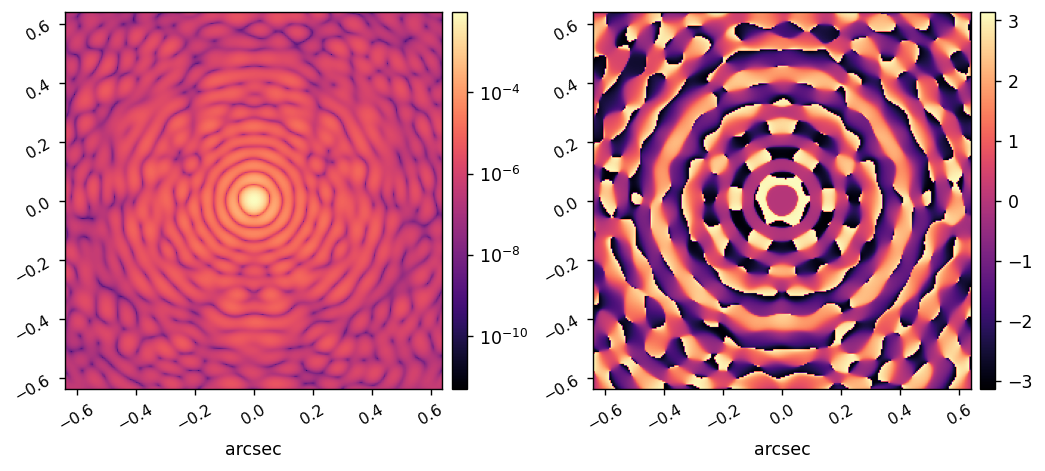

In [9]:
reload(poppy_optics)
from poppy_optics import *
clear_output()

poppy_log.disabled = False

osys.add_pupil(circ_pupil)
# osys.add_pupil(multi_circ_pupil)
# osys.add_pupil(rect_pupil)
# osys.add_pupil(square_pupil)
# osys.add_pupil(hex_pupil_side)
# osys.add_pupil(hex_pupil_flat)
# osys.add_pupil(multi_hex_pupil_side)
# osys.add_pupil(multi_hex_pupil_flat)
# osys.add_pupil(ngon_pupil)
# osys.add_pupil(sec_obs)
# osys.add_pupil(asym_sec_obs)
# osys.add_pupil(compound_pupil)
# osys.add_pupil(rpupil_array)
# osys.add_pupil(rprimary_opd_array)
# osys.add_pupil(rpupil_opd_array)
# osys.add_pupil(rpupil)
# osys.add_pupil(rprimary_opd)
# osys.add_pupil(rpupil_opd)

# osys.add_pupil(scalar_opd)
# osys.add_pupil(zern_wfe)
# osys.add_pupil(sin_wfe)
# osys.add_pupil(kol_wfe)
# osys.add_pupil(psd_wfe)

osys.add_image(scalar_trans_image)
# osys.add_image(knife_edge)
# osys.add_image(blc_circ)
# osys.add_image(blc_lin)
# osys.add_image(fqpm)
# osys.add_image(rect_stop)
# osys.add_image(square_stop)
# osys.add_image(hex_stop)
# osys.add_image(annular_stop)
# osys.add_image(circ_occ)
# osys.add_image(bar_occ)

# osys.add_pupil(zern_wfe)
# osys.add_pupil(scalar_trans_pupil)
# osys.add_pupil(thin_lens)
# osys.add_pupil(gauss_ap)
# osys.add_pupil(inv_circ)
osys.add_pupil(FDM)

osys.add_detector(pixelscale=0.020, fov_arcsec=4.0)

poppy_log.disabled = False

psf, wfs = osys.calc_psf(wavelength=wavelength, return_intermediates=True)

misc.myimshow2(wfs[-1].intensity, wfs[-1].phase, npix=256, lognorm1=True,
               pxscl1=wfs[-1].pixelscale, pxscl2=wfs[-1].pixelscale)

# Show all waves

0 0.009375 m / pix


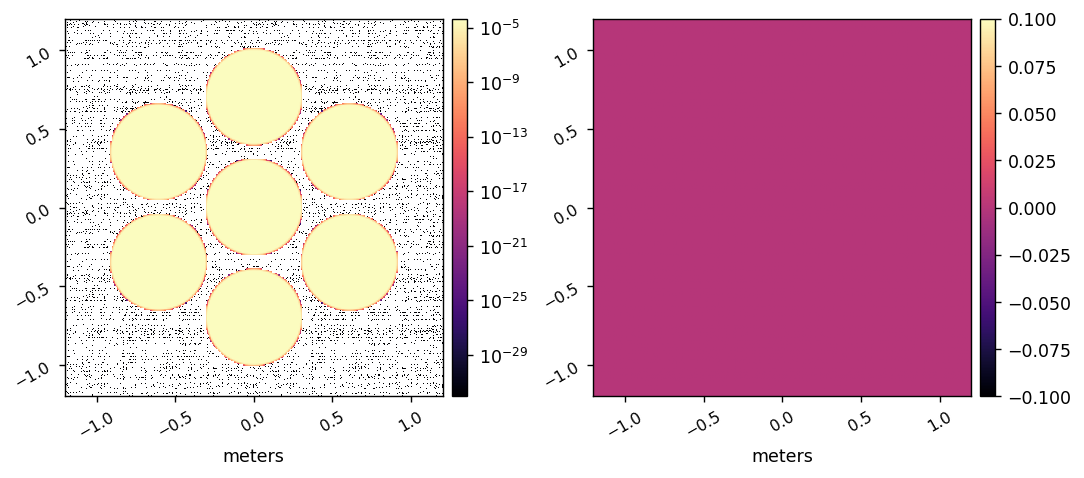

1 0.010742958658702936 arcsec / pix


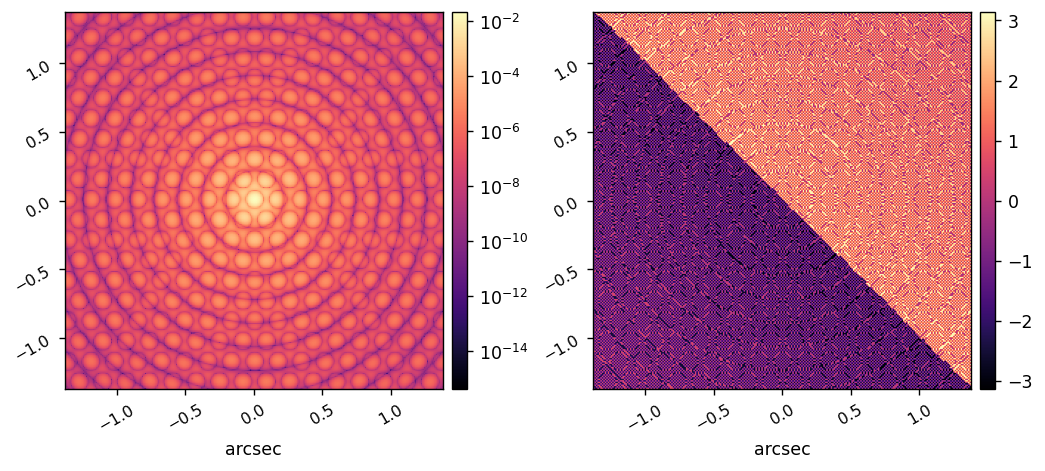

2 0.009375 m / pix


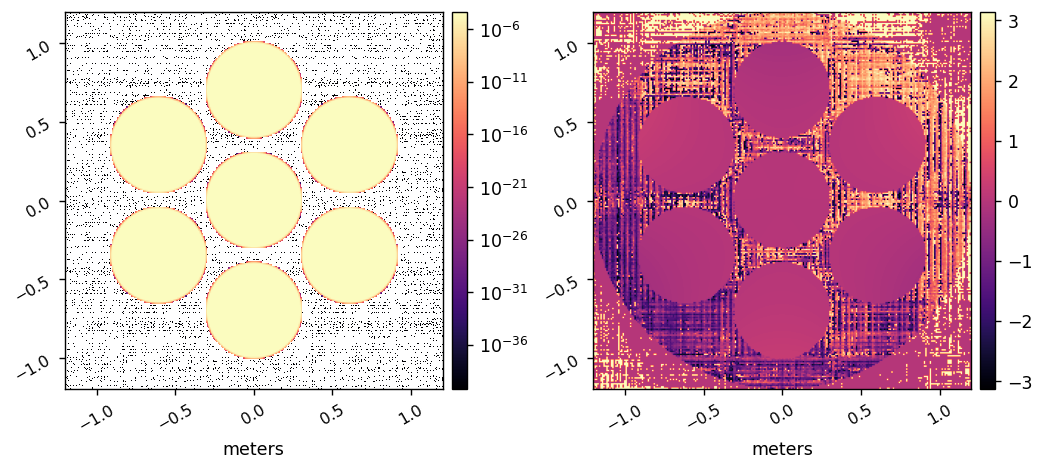

3 0.005 arcsec / pix


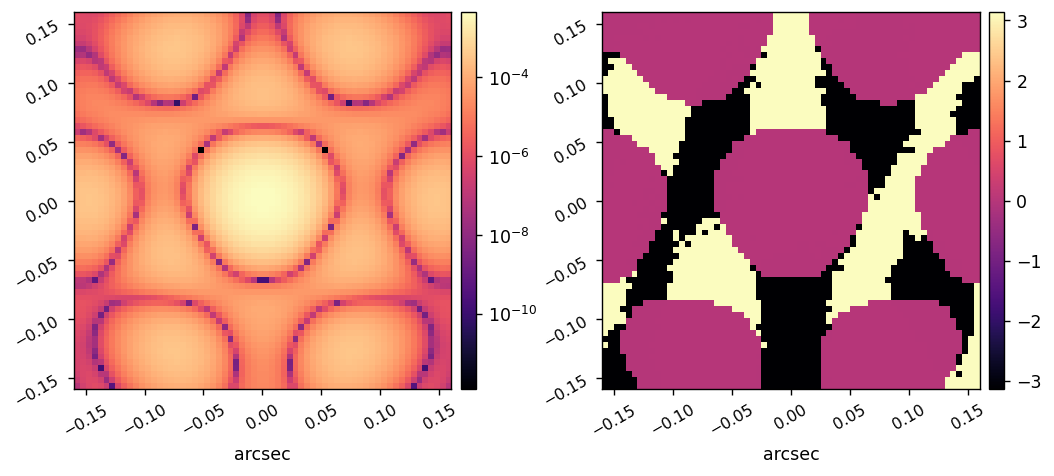

In [34]:
for i,wf in enumerate(wfs):
    if (i-len(wfs))==-1: n = 64
    else: n = npix
    misc.myimshow2(wf.intensity, wf.phase, npix=n, lognorm1=True,
                   pxscl1=wf.pixelscale, pxscl2=wf.pixelscale)